<a href="https://colab.research.google.com/github/krishnapriya-atla/Software-effort-estimation/blob/main/SPM_Project_Effort_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Software Effort Estimation***

### **`About the data set and attributes`**

> * **TeamExp** :- Team experience measured in years
* **ManagerExp** :- Manager experience measured in years
* **YearEnd** :- Year the project ended
* **Length** :- Duration of the project in months
* **Effort** :- ActualEffort is measured in person-hours
* **Transactions** :- Transactions is a count of basic logical transactions in the system **(t)**
* **Entities** :- Entities is the number of entities in the systems data model **(E)**
* **PointNonAdjust** :- Size of the project measured in adjusted function points  **(FP)** (also we can say it as system size)
* **Adjustment** :- Adjustment points
* **PointAjust** :- Size of the project measured in unadjusted PointsAdj
* **Language** :- Type of language used in the project expressed as 1, 2 or 3. 



In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import sys
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV



In [ ]:
!wget https://github.com/krishnapriya-atla/dataset/raw/main/desharnais.csv

--2021-12-27 16:33:12--  https://github.com/krishnapriya-atla/dataset/raw/main/desharnais.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krishnapriya-atla/dataset/main/desharnais.csv [following]
--2021-12-27 16:33:13--  https://raw.githubusercontent.com/krishnapriya-atla/dataset/main/desharnais.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3393 (3.3K) [text/plain]
Saving to: ‘desharnais.csv.1’

desharnais.csv.1    100%[===================>]   3.31K  --.-KB/s    in 0s      

2021-12-27 16:33:13 (38.4 MB/s) - ‘desharnais.csv.1’ saved [3393/3393]



## ***`Loading Data and analysing the data`***

In [ ]:
sftdata=pd.read_csv("desharnais.csv")

In [ ]:
sftData=sftdata
print(sftData.head())
print('size of the data is : ',sftData.size)
print('\n\nShape of the data set : ',sftData.shape)
print('\n\nInfo of the dataset : \n',sftData.info())
print('\n\ndetail describe of the data : \n',sftData.describe())
print("\n\nTypes of the dataset columns : \n",sftData.dtypes)

   id  Project  TeamExp  ...  Adjustment  PointsAjust  Language
0   1        1        1  ...          34          302         1
1   2        2        0  ...          33          315         1
2   3        3        4  ...          18           83         1
3   4        4        0  ...          30          303         1
4   5        5        0  ...          24          208         1

[5 rows x 13 columns]
size of the data is :  1053


Shape of the data set :  (81, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-n

## Applying machine learning algorithim before preprocessing

###Splitting data 
#####Note: Splitting before feature scaling, data imputation and outlier removal to avoid data leakage and generalise model on unknown data


In [ ]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort"]),sftData["Effort"],train_size=0.7,random_state=40)

In [ ]:
print(f"Size of the x_train data: {X_train.shape}")
print(f"Size of the x_test data: {X_test.shape}")
print(f"Size of the y_train data: {y_train.shape}")
print(f"Size of the y_test data: {y_test.shape}")

Size of the x_train data: (56, 12)
Size of the x_test data: (25, 12)
Size of the y_train data: (56,)
Size of the y_test data: (25,)


### Linear Regression before preprocesing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_actual, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_actual, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_actual, y_pred) 
    mse=metrics.mean_squared_error(y_actual, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_actual, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_actual, y_pred)
    r2=metrics.r2_score(y_actual, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort"]),sftData["Effort"],train_size=0.9,random_state=96)
l_model = LinearRegression()
l_model.fit(X_train, y_train)
print('Accuracy of the model is ',l_model.score(X_test, y_test))
y_pred=l_model.predict(X_test)
regression_results(y_test,y_pred)

Accuracy of the model is  0.5469071878088282
explained_variance:  0.5497
mean_squared_log_error:  0.1895
r2:  0.5469
MAE:  1766.9706
MSE:  6346021.3509
RMSE:  2519.1311


### Knn Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort"]),sftData["Effort"],train_size=0.9,random_state=5)
knr_clf = KNeighborsRegressor(n_neighbors=2, weights='uniform',algorithm="auto",p=2)   #giving more accuracy
# knr_clf = KNeighborsRegressor()
knr_clf.fit(X_train, y_train) 
print('Accuracy of the model is ',knr_clf.score(X_test, y_test))


Accuracy of the model is  0.7238166435823126


In [ ]:
knr_clf.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

### **Multiple Logistic Regression**

In [ ]:
sftData.columns

Index(['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort',
       'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment',
       'PointsAjust', 'Language'],
      dtype='object')

In [ ]:
feature_cols = ['TeamExp','ManagerExp','YearEnd','Length','Transactions','Entities','PointsNonAdjust','Adjustment','Language']
X = sftData[feature_cols] # Features
y = sftData['Effort'] # Target variable

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


> *Min Max Scalling*



In [ ]:
from sklearn.preprocessing import MinMaxScaler
datatemp=sftData
scaler = MinMaxScaler()
coln=datatemp.columns

In [ ]:
datatemp = scaler.fit_transform(datatemp)
datatemp=pd.DataFrame(datatemp)
datatemp.columns=coln
datatemp

id  Project  TeamExp  ...  Adjustment  PointsAjust  Language
0   0.0000   0.0000      0.4  ...    0.617021     0.227704       0.0
1   0.0125   0.0125      0.2  ...    0.595745     0.240038       0.0
2   0.0250   0.0250      1.0  ...    0.276596     0.019924       0.0
3   0.0375   0.0375      0.2  ...    0.531915     0.228653       0.0
4   0.0500   0.0500      0.2  ...    0.404255     0.138520       0.0
..     ...      ...      ...  ...         ...          ...       ...
76  0.9500   0.9500      1.0  ...    0.723404     0.333966       1.0
77  0.9625   0.9625      1.0  ...    0.617021     0.222960       0.0
78  0.9750   0.9750      1.0  ...    0.744681     0.526565       0.0
79  0.9875   0.9875      1.0  ...    0.808511     0.602467       1.0
80  1.0000   1.0000      1.0  ...    0.617021     1.000000       0.0

[81 rows x 13 columns]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=['Effort']),y,train_size=0.75,random_state=19)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_train=logreg.predict(X_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(round(y_test/1000).astype(int), round(pd.DataFrame(y_pred/1000)).astype(int)))

Accuracy: 0.19047619047619047


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Preprocessing

In [ ]:
corr = sftData.corr()
corr.style.background_gradient(cmap='coolwarm')

### Profile Report of the dataset

In [ ]:
sftprofile=ProfileReport(sftData,title='Software Project Effort Estimation',html={'style':{'full_width':True}})
sftprofile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


> **By observing the profile report**

---

**For TeamExp** : We are having the -1 also but experience should br >=0 only so it is the noisy data (only 2 rows having -1 so we can keep NA for that one

**For ManagerExp** : We are having the -1 also but experience should br >=0 only so it is the noisy data (only 2 rows having -1 so we can keep NA for that one

**For Language** : it is an categorical column with numbers 1,2,3

from correlation 

1.   Length,Transactions,Entities,PointNonAdjust,Adjsutment,pointAdjust

From the interaction 

1.   we can say for team exp and effort having an outlier at 4
2.   for transaction and effort also having 1 outlier observed in the graph
3.   for pointsnotadjust and effort also having 1 outlier observed in the graph



In [ ]:
#@title After observing the above profile report id and Project columns both are having unique and equal data. so for prediction those columns are not useful { form-width: "40%", display-mode: "both" }

sftData=sftData.drop(columns=["id","Project"])
sftData.columns  #checking whether the columns are dropped or not

Index(['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions',
       'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language'],
      dtype='object')

In [ ]:
#@title Here Language is given as int dtype but it is an character dtype(factors)
sftData['Language']=sftData['Language'].astype('object')
sftData.dtypes

TeamExp             int64
ManagerExp          int64
YearEnd             int64
Length              int64
Effort              int64
Transactions        int64
Entities            int64
PointsNonAdjust     int64
Adjustment          int64
PointsAjust         int64
Language           object
dtype: object

In [ ]:
#@title Replace the -1 value with 1 of TeamExp and ManagerExp, because in experience there wont be negative so it is noiss data { form-width: "50%" }
sftData['ManagerExp'][sftData['ManagerExp']==-1]=1
sftData['TeamExp'][sftData['TeamExp']==-1]=1
sftData.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TeamExp  ManagerExp  ...  Adjustment  PointsAjust
count  81.000000   81.000000  ...   81.000000    81.000000
mean    2.234568    2.604938  ...   27.629630   289.234568
std     1.334837    1.522161  ...   10.591795   185.761088
min     0.000000    0.000000  ...    5.000000    62.000000
25%     1.000000    1.000000  ...   20.000000   152.000000
50%     2.000000    3.000000  ...   28.000000   255.000000
75%     4.000000    4.000000  ...   35.000000   351.000000
max     4.000000    7.000000  ...   52.000000  1116.000000

[8 rows x 10 columns]

In [ ]:
#@title Now encoding the labels into number if exist using Label encoding 
from sklearn.preprocessing import LabelEncoder
encoders={}
for col in sftData:
  if sftData[col].dtype==np.object:
    encoders[col]=LabelEncoder()
    sftData[col]=encoders[col].fit_transform(sftData[col])
print(f"Label  encoded columns are:  {list(encoders.keys())}")

Label  encoded columns are:  ['Language']


In [ ]:
#@title Creating a column name list with numerical data of dataset and categorical
categorical_columns = set(encoders.keys())
all_columns = set(sftData.columns)
numerical_columns = list(all_columns.difference(categorical_columns))
print(f"Categorical column names are : {categorical_columns}")
print(f"All column names are : {all_columns}")
print(f"Numerical column names are : {numerical_columns}")

Categorical column names are : {'Language'}
All column names are : {'Language', 'Length', 'PointsNonAdjust', 'Transactions', 'Entities', 'ManagerExp', 'PointsAjust', 'Adjustment', 'Effort', 'YearEnd', 'TeamExp'}
Numerical column names are : ['Length', 'PointsNonAdjust', 'Transactions', 'Entities', 'ManagerExp', 'PointsAjust', 'Adjustment', 'Effort', 'YearEnd', 'TeamExp']


###Inspecting duplicates

In [ ]:
print(f"Duplicates in the data: {sftData.duplicated().sum()}")

Duplicates in the data: 0


### Detecting outliers for numerical data
>**high oulier** = Q3 + (1.5)\*IQR <br>
>**lower oulier** = Q1 - (1.5)\*IQR <br>
> **IQR** = (Q3-Q1)

In [ ]:
high_out = sftData[numerical_columns].quantile(q=0.75) + 1.5 * ( sftData[numerical_columns].quantile(q=0.75) - sftData[numerical_columns].quantile(q=0.25) )
low_out = sftData[numerical_columns].quantile(q=0.25) - 1.5 * ( sftData[numerical_columns].quantile(q=0.75) - sftData[numerical_columns].quantile(q=0.25) )
print("sftData dataset: \n")
print(f"High Outliers\n{high_out}\n")
print(f"Low Outliers\n{low_out}")

sftData dataset: 

High Outliers
Length                26.0
PointsNonAdjust      696.0
Transactions         428.0
Entities             337.0
ManagerExp             8.5
PointsAjust          649.5
Adjustment            57.5
Effort             11277.0
YearEnd               90.0
TeamExp                8.5
dtype: float64

Low Outliers
Length               -6.0
PointsNonAdjust    -136.0
Transactions       -116.0
Entities           -111.0
ManagerExp           -3.5
PointsAjust        -146.5
Adjustment           -2.5
Effort            -3003.0
YearEnd              82.0
TeamExp              -3.5
dtype: float64


###Visualising outliers


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

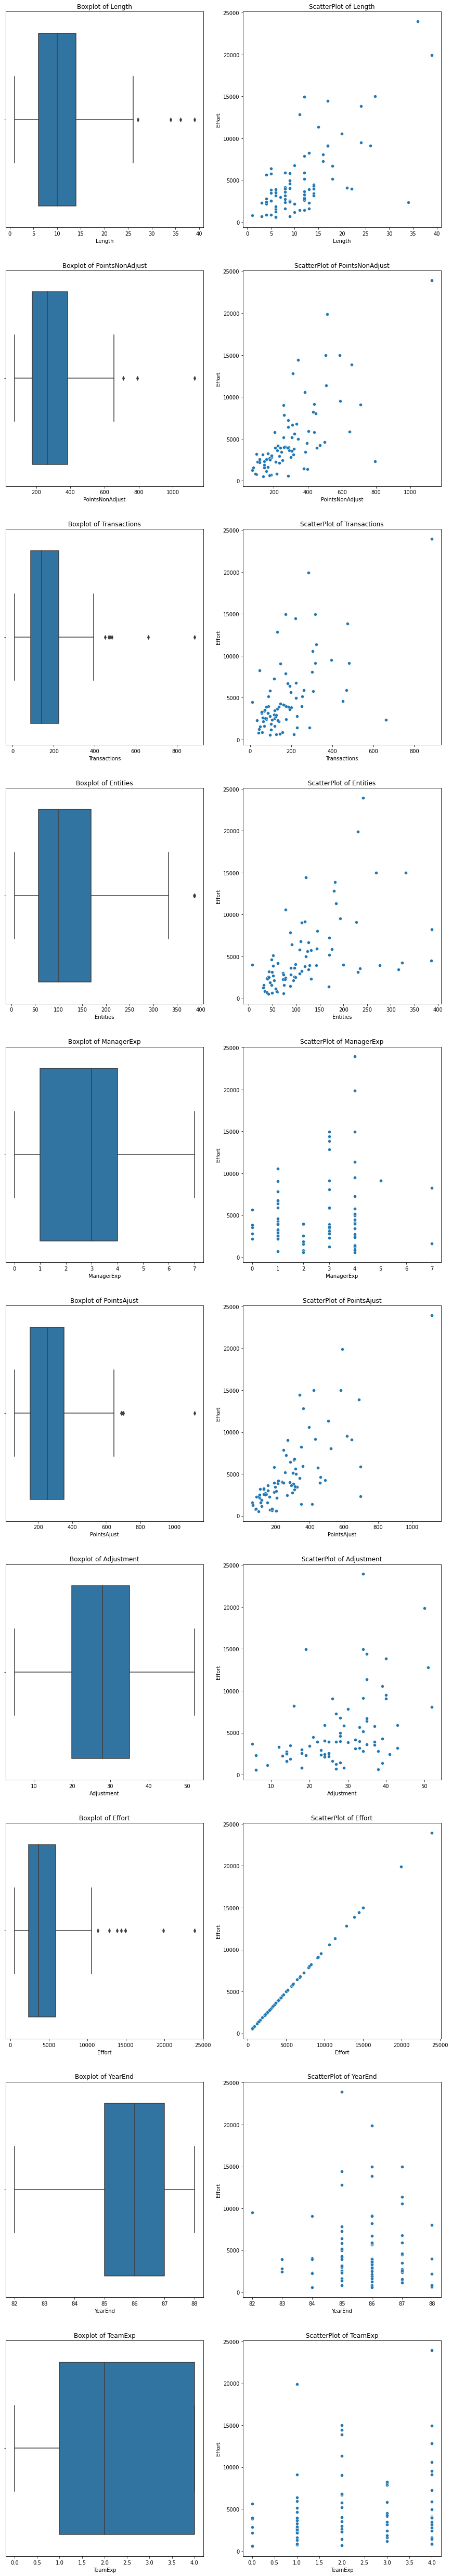

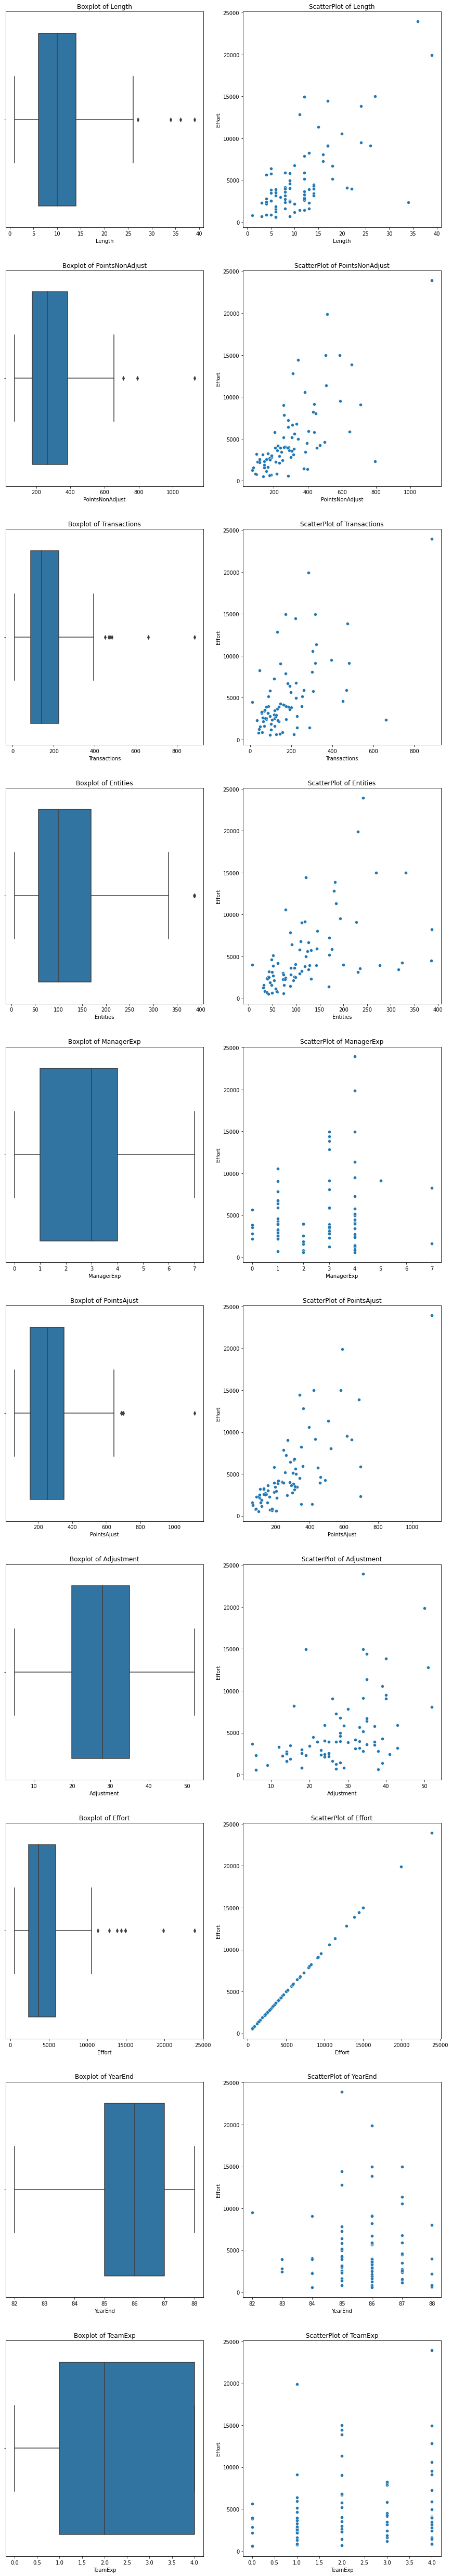

In [ ]:
fig, axes=plt.subplots(len(numerical_columns),2,figsize=(15,90))
for i in range(len(numerical_columns)):
    sns.boxplot(data=sftData,x=numerical_columns[i],ax=axes[i,0])
    axes[i,0].set_title("Boxplot of "+numerical_columns[i])
    sns.scatterplot(data=sftData, x=numerical_columns[i], y="Effort",ax=axes[i,1])
    axes[i,1].set_title("ScatterPlot of "+numerical_columns[i])
plt.show()
fig

###Removing Outlier


In [ ]:
from numpy.testing._private.utils import integer_repr
from numpy.core.numeric import NaN
# from numpy.core.numeric import NaN
def remove_lows(features,i,high_outlier,low_outlier):
    features[i][features[i]<low_outlier[i]]=int(features[i].median(skipna=True))
    return features[i]
def remove_highs(features,i,high_outlier,low_outlier):
    features[i][features[i]>high_outlier[i]]=int(features[i].median(skipna=True))
    return features[i]
def remove_both(features,i,high_outlier,low_outlier):
    features[i][(features[i]>high_outlier[i])|(features[i]<low_outlier[i])]=int(features[i].median(skipna=True))
    return features[i]
def same(features,i,high_outlier,low_outlier):
    return features[i]
def outlier_remover(features,targets,high_outlier,low_outlier):
    best_process={0:same,1:remove_lows,2:remove_highs,3:remove_both}
    column_names=features.columns
    features_copy=features.copy()
    for i in column_names:
        #Storing the initial correlation and appending the correlation of outlier removal datasets
        correlations=[pd.DataFrame(features[i]).corrwith(targets)[0]]
        #removing lower outliers
        correlations.append(pd.DataFrame(best_process[1](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #removing higher outliers
        correlations.append(pd.DataFrame(best_process[2](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #removing higher and lower outliers
        correlations.append(pd.DataFrame(best_process[3](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #selecting best approac
        features[i]=best_process[3](features,i,high_outlier,low_outlier)
    return features

In [ ]:
from itertools import compress 
#finding numerical columns where lower outlier is not equal to high outlier
sftData_outlier_col=list(compress(numerical_columns, (high_out!=low_out).to_list()))
#removing outliers in sftData set
sftData=outlier_remover(sftData[sftData_outlier_col],sftData['Effort'],high_out,low_out)

### After removing the outliers and filled with appropriate value

In [ ]:
high_after_out = sftData[numerical_columns].quantile(q=0.75) + 1.5 * ( sftData[numerical_columns].quantile(q=0.75) - sftData[numerical_columns].quantile(q=0.25) )
low_after_out = sftData[numerical_columns].quantile(q=0.25) - 1.5 * ( sftData[numerical_columns].quantile(q=0.75) - sftData[numerical_columns].quantile(q=0.25) )
print("sftData dataset: \n")
print(f"Before\nHigh Outliers\n{high_out}\n")
print(f"Low Outliers\n{low_out}\n")
print(f"After\nHigh Outliers\n{high_after_out}\n")
print(f"Low Outliers\n{low_after_out}\n")

sftData dataset: 

Before
High Outliers
Length                26.0
PointsNonAdjust      696.0
Transactions         428.0
Entities             337.0
ManagerExp             8.5
PointsAjust          649.5
Adjustment            57.5
Effort             11277.0
YearEnd               90.0
TeamExp                8.5
dtype: float64

Low Outliers
Length               -6.0
PointsNonAdjust    -136.0
Transactions       -116.0
Entities           -111.0
ManagerExp           -3.5
PointsAjust        -146.5
Adjustment           -2.5
Effort            -3003.0
YearEnd              82.0
TeamExp              -3.5
dtype: float64

After
High Outliers
Length               23.5
PointsNonAdjust     596.0
Transactions        353.0
Entities            274.5
ManagerExp            8.5
PointsAjust         587.0
Adjustment           57.5
Effort             8022.0
YearEnd              90.0
TeamExp               8.5
dtype: float64

Low Outliers
Length               -4.5
PointsNonAdjust     -76.0
Transactions        -71.

In [ ]:
from itertools import compress 
#finding numerical columns where lower outlier is not equal to high outlier
sftData_outlier_col=list(compress(numerical_columns, (high_out!=low_out).to_list()))
#removing outliers in sftData set
sftData=outlier_remover(sftData[sftData_outlier_col],sftData['Effort'],high_after_out,low_after_out)

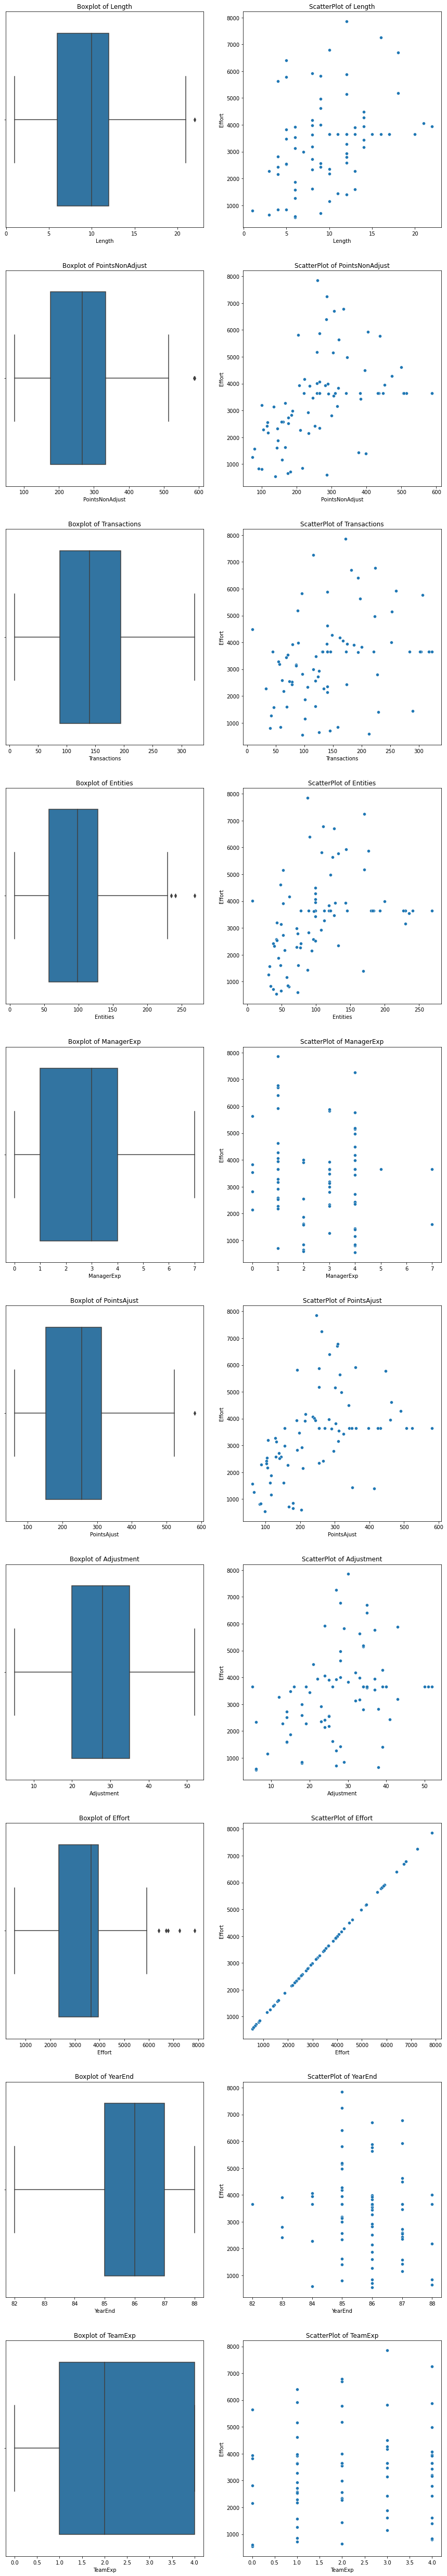

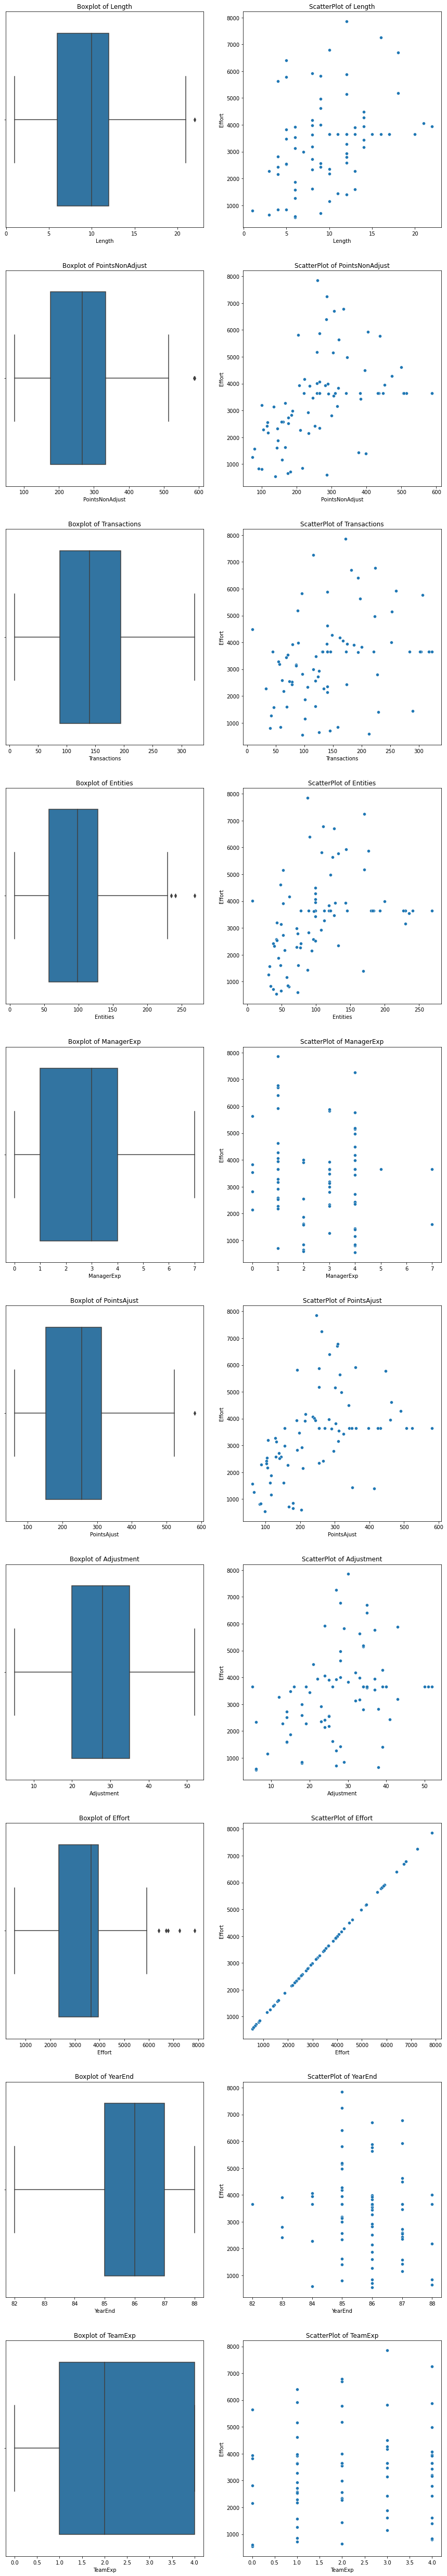

In [ ]:
fig, axes=plt.subplots(len(numerical_columns),2,figsize=(15,90))
for i in range(len(numerical_columns)):
    sns.boxplot(data=sftData,x=numerical_columns[i],ax=axes[i,0])
    axes[i,0].set_title("Boxplot of "+numerical_columns[i])
    sns.scatterplot(data=sftData, x=numerical_columns[i], y="Effort",ax=axes[i,1])
    axes[i,1].set_title("ScatterPlot of "+numerical_columns[i])
plt.show()
fig

In [ ]:
sftData.dtypes

Length             int64
PointsNonAdjust    int64
Transactions       int64
Entities           int64
ManagerExp         int64
PointsAjust        int64
Adjustment         int64
Effort             int64
YearEnd            int64
TeamExp            int64
dtype: object

In [ ]:
tempdata=sftData

### Min Max Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
coln=sftData.columns

In [ ]:
sftData = scaler.fit_transform(sftData)
sftData=pd.DataFrame(sftData)
sftData.columns=coln
sftData

Length  PointsNonAdjust  Transactions  ...    Effort   YearEnd  TeamExp
0   0.523810         0.450485      0.777070  ...  0.630268  0.500000     0.25
1   0.142857         0.481553      0.598726  ...  0.696360  0.666667     0.00
2   0.000000         0.052427      0.098726  ...  0.035441  0.500000     1.00
3   0.190476         0.477670      0.608280  ...  0.449234  0.666667     0.00
4   0.142857         0.312621      0.417197  ...  0.219349  0.666667     0.00
..       ...              ...           ...  ...       ...       ...      ...
76  0.523810         0.631068      0.700637  ...  0.116858  0.500000     1.00
77  0.523810         0.440777      0.694268  ...  0.308429  0.166667     1.00
78  0.428571         1.000000      0.417197  ...  0.424330  0.000000     1.00
79  0.523810         0.374757      0.417197  ...  0.729885  0.666667     1.00
80  0.428571         0.374757      0.417197  ...  0.424330  0.500000     1.00

[81 rows x 10 columns]

### Splitting the data to visualize the data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort"]),sftData["Effort"],train_size=0.9,random_state=96)

In [ ]:
all_columns = set(X_train.columns)
numerical_columns = list(all_columns.difference(categorical_columns))
sftData

Length  PointsNonAdjust  Transactions  ...    Effort   YearEnd  TeamExp
0   0.523810         0.450485      0.777070  ...  0.630268  0.500000     0.25
1   0.142857         0.481553      0.598726  ...  0.696360  0.666667     0.00
2   0.000000         0.052427      0.098726  ...  0.035441  0.500000     1.00
3   0.190476         0.477670      0.608280  ...  0.449234  0.666667     0.00
4   0.142857         0.312621      0.417197  ...  0.219349  0.666667     0.00
..       ...              ...           ...  ...       ...       ...      ...
76  0.523810         0.631068      0.700637  ...  0.116858  0.500000     1.00
77  0.523810         0.440777      0.694268  ...  0.308429  0.166667     1.00
78  0.428571         1.000000      0.417197  ...  0.424330  0.000000     1.00
79  0.523810         0.374757      0.417197  ...  0.729885  0.666667     1.00
80  0.428571         0.374757      0.417197  ...  0.424330  0.500000     1.00

[81 rows x 10 columns]

###Visualising the data distribution of numerical columns on train and test set

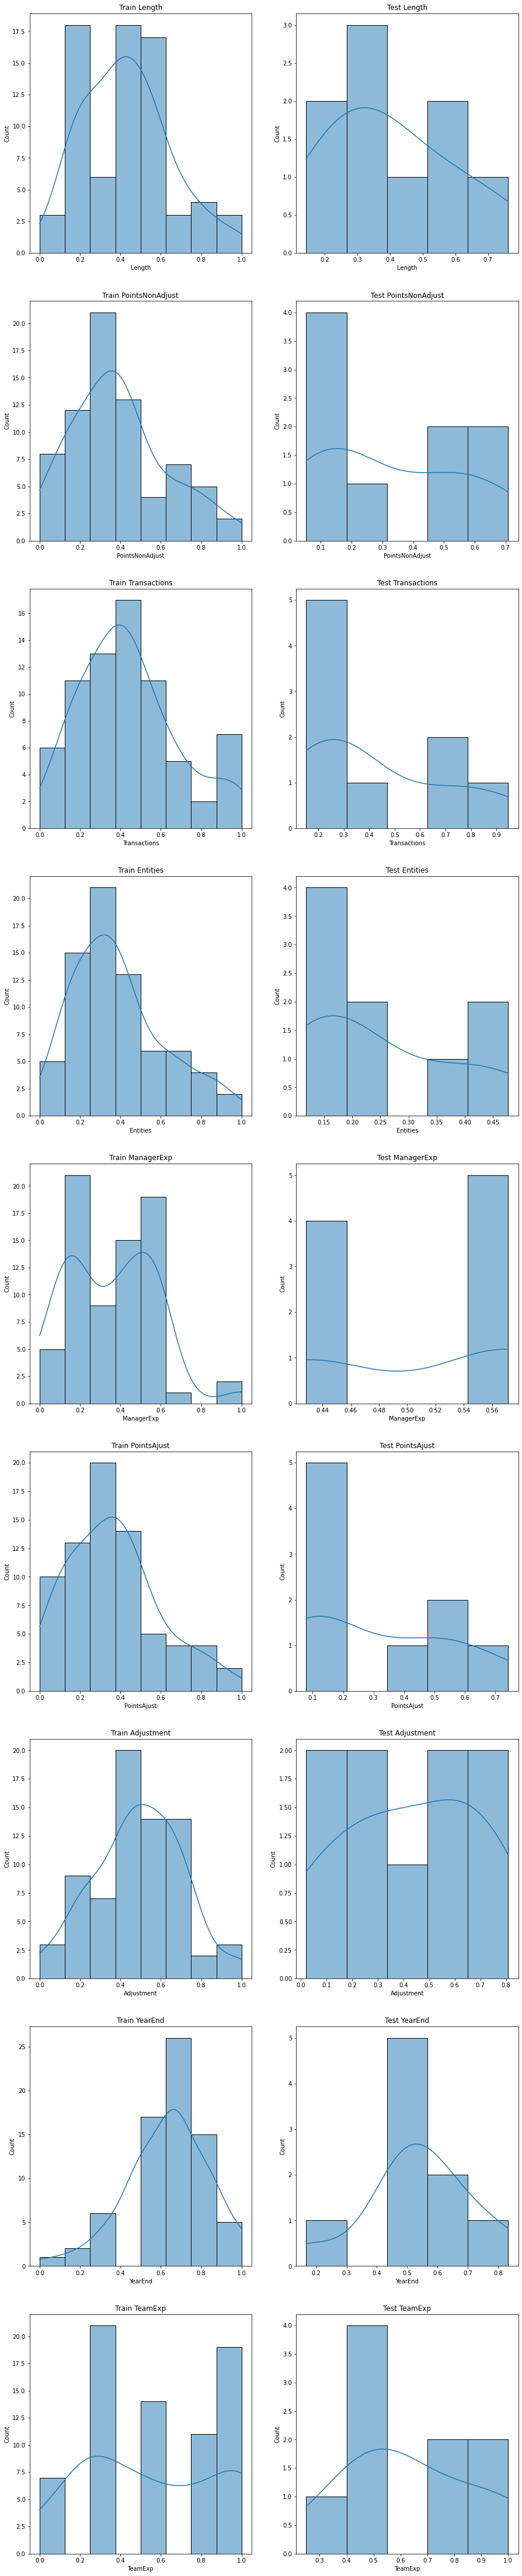

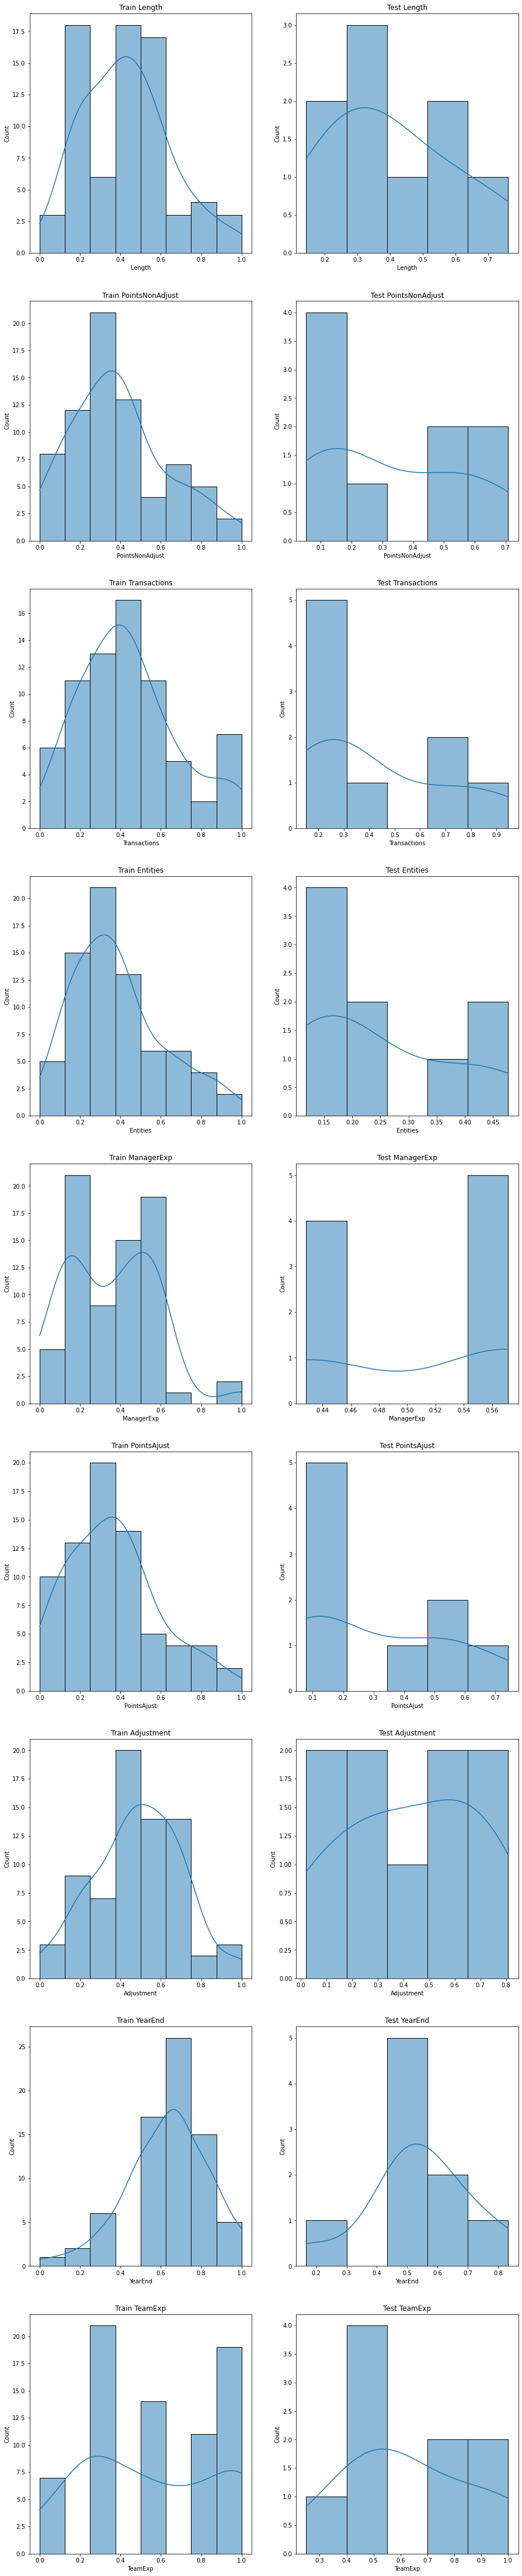

In [ ]:
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
fig, axes=plt.subplots(len(numerical_columns),2,figsize=(15,80))
for i in range(len(numerical_columns)):
    sns.histplot(data=X_train,x=numerical_columns[i],ax=axes[i,0],kde=True)
    axes[i,0].set_title("Train "+numerical_columns[i])
    sns.histplot(data=X_test,x=numerical_columns[i],ax=axes[i,1],kde=True)
    axes[i,1].set_title("Test "+numerical_columns[i])
plt.show()
fig

From above visualization the distrubution of data is same there
pointsNonAdjust,Yearend,pointsadjust,adjustement,Transactions,Entities

###Measuring skewness

In [ ]:
#@title Here if we see the skewness output for every column. Every thing is having less Skewness
for i in numerical_columns:
    print(f"{i} column in train set skewness: {scipy.stats.skew(X_train[[i]])[0]}")
    print(f"{i} column in test set skewness: {scipy.stats.skew(X_test[[i]])[0]}")
    print("\n******************************************************************")

Length column in train set skewness: 0.48285322359396404
Length column in test set skewness: 0.47271363246646303

******************************************************************
PointsNonAdjust column in train set skewness: 0.6207563265683747
PointsNonAdjust column in test set skewness: 0.340882590538634

******************************************************************
Transactions column in train set skewness: 0.6136637802528015
Transactions column in test set skewness: 0.7536748952482889

******************************************************************
Entities column in train set skewness: 0.7838868723911527
Entities column in test set skewness: 0.6327407124385707

******************************************************************
ManagerExp column in train set skewness: 0.44738185128888686
ManagerExp column in test set skewness: -0.22360679774997902

******************************************************************
PointsAjust column in train set skewness: 0.622108464332372

## Inspecting improvements in model

### Linear Regression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(tempdata.drop(columns=["Effort","TeamExp","ManagerExp","Length"]),sftdata["Effort"],train_size=0.7,random_state=96)
l_model = LinearRegression()
l_model.fit(X_train, y_train)
print(f"Accuracy of the model after the preprocessing is {np.round(l_model.score(X_test,y_test)*100,decimals=2)}%")
y_pred=l_model.predict(X_test)
regression_results(y_test,y_pred)

Accuracy of the model after the preprocessing is 66.01%
explained_variance:  0.6747
mean_squared_log_error:  0.4284
r2:  0.6601
MAE:  1898.7375
MSE:  7179104.1113
RMSE:  2679.385


### KNN Regression

In [ ]:
knn_data=tempdata
X_train,X_test,y_train,y_test=train_test_split(knn_data.drop(columns=["Effort","TeamExp","ManagerExp","Length"]),sftData["Effort"],train_size=0.9,random_state=28)
knr_clf = KNeighborsRegressor(n_neighbors=2, weights='uniform',algorithm="auto",p=2)
knr_clf.fit(X_train, y_train) 
print(knr_clf.score(X_test, y_test))

0.677460197053083


### **Multiple Logistic Regression**

In [ ]:
feature_cols = ['YearEnd','Length','Transactions','Entities','PointsNonAdjust','Adjustment']
X = sftData[feature_cols] # Features
y = sftData['Effort'] # Target variable

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=2)
logreg = LogisticRegression()
logreg.fit(X_train,np.round(y_train))
y_pred_train=logreg.predict(X_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(y_pred)))

Accuracy: 0.7619047619047619


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=96)
rfc = RandomForestClassifier()
rfc.fit(X_train, np.round(y_train))
rfc.score(X_test, np.round(y_test))

0.8571428571428571

## ***Applying Nueral Networks***

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sftData.drop(columns=["Effort","TeamExp","ManagerExp","Length"]),sftData["Effort"], train_size = 0.75, random_state = 40)

### **Appling MLPClassifier(MULTI-LAYER PERCEPTRON)**

In [ ]:
mlp = MLPClassifier(max_iter=1000, activation='relu')
mlp.fit(X_train,np.round(y_train))
pred = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
cm = confusion_matrix(np.round(y_test), pred)
print('Confusion Matrix\n',cm)
accuracy_score(np.round(y_test), pred)

Confusion Matrix
 [[18  1]
 [ 1  1]]


0.9047619047619048

### **Appling ANN**

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
X_train, X_test, y_train, y_test = train_test_split(sftData.drop(columns=["Effort","TeamExp","ManagerExp","Length"]),sftData["Effort"], train_size = 0.9, random_state = 40)

In [ ]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 6, epochs = 10)

Epoch 1/10
12/12 [==============================] - 1s 3ms/step - loss: 0.6974 - accuracy: 0.0278
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.0278
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.0278
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.0278
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.0278
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.0278
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.0139
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.0139
Epoch 9/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.0139
Epoch 10/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.0139


In [ ]:
y_pred = ann.predict(X_test)
cm1 = confusion_matrix(np.round(y_test), np.round(y_pred))
print(cm1)

[[7 1]
 [1 0]]


In [ ]:
print(f"Accuracy of the model after the preprocessing is {np.round(accuracy_score(np.round(y_test), np.round(y_pred))*100,decimals=2)}%")


Accuracy of the model after the preprocessing is 77.78%




# ***Final Conclusion***


*   Here we had performed a 4 Machine Learning Algorithims and 2 neural netwok Algorithim
    Those are : 
        1)Linear Regression(LR)
        2)K-Nearest Neighbours Regression(KNN)
        3)Multi Logistic Regression(MLR)
        4)Random Forest(RF)
        5)MultiLayer Perceptron(MLP)
        6)Artificial Nueural network(ANN)

*   From the above we got the accuracy be like 
        Linear Regression had got an accuracy of 89.91%
        KNN Regression had got an accuracy of 67.7%
        Multi Logistic Regression had got an accuracy of 76.1 
        Random Forest had got an accuracy of 85.51 
        MultiLayer Perceptron had got an accuracy of 90.4%
        Artificial Neural network had got an accuracy of 77.78%
* From the above analysis we can say that MLP got the better accuracy


> Observation
      From the bove outputs we can say the by doing preprocession and rescaling Multi-Logistic Regression has increase the accuracy from almost 20% to 76%



---


> ***What we have did in the Project***
          
          1)Checked the accuracy for the algorithms before preprocession
          2)Imported the required Packages
          3)Applied a Preprocess techniques
                i)In preprocess we had did a 
                      Data analysis Using Pandas Profiling Report
                      Removing Outliers using Standard Formula
                      Visualization
                      Normalization using Min-Scale Concept 
          4)Created the models for the algorithms and trained the data
          5) Finally Checked the accuracy of all the algorithims and then came to the best accuracy algorithm for Software Effort Estimation.

---

> **What is in the Profile Report(Pandas Profiling Report)**

      Full detailed analysis of dataset will be given from the pandas profile
          1)Overview
              i)Variable details like Distinct,mean,min and max,missing data etc
                    it will also show the statistics,Histogram,Common and Extreme values
              ii)Interactions between 2 columns of all pairs of columns in the dataset(we can call it as the scatter plot for 2 columns)
              iii)Correlations of dataset
                    Having 4 types of correlations.
                        a)Spearman's 
                        b)Pearson's
                        c)Kendali's
                        d)Phik(it is new and practical correlation coefficient
              iV)Missing Values
              V)Sample data
          2)Alerts









